# COMPARING REGRESSORS

## 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.feature_selection import VarianceThreshold

## 2. load the Dataset

In [2]:
X = pd.read_csv('data/fingerprints.csv', index_col = 0)
df = pd.read_csv('data/p2x4_final.csv')
df_Y = df['pIC50']
Y = df_Y

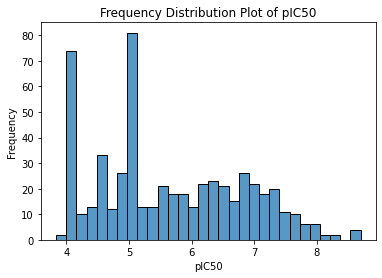

In [3]:
sns.histplot(data=df, x='pIC50', kde=False, bins=30)

# Set the title and labels for the plot
plt.title('Frequency Distribution Plot of pIC50')
plt.xlabel('pIC50')
plt.ylabel('Frequency')


#plt.savefig('figures/pIC50_frequency_plot.png')
# Show the plot
plt.show()

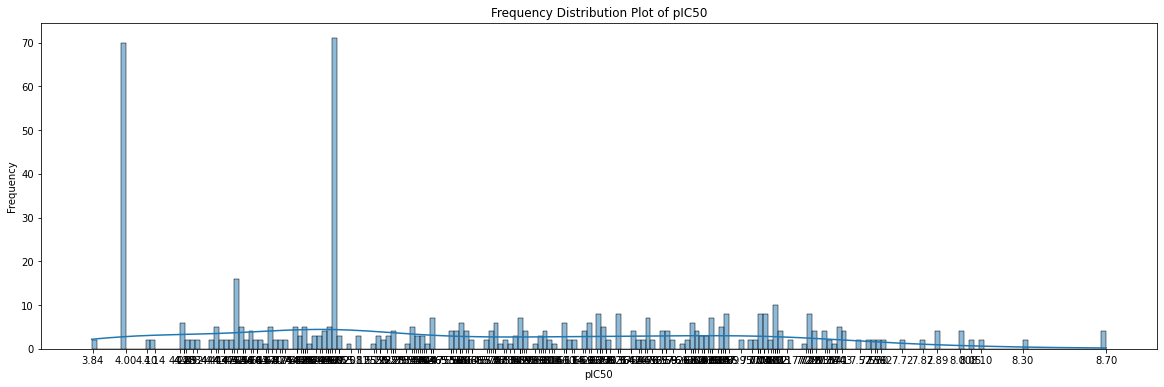

In [4]:
# Increase the number of bins to match the number of unique values in the data
num_unique_values = df['pIC50'].nunique()
bins = num_unique_values

# Use seaborn's histplot function to plot the histogram and KDE
plt.figure(figsize=(20,6))
sns.histplot(data=df, x='pIC50', kde=True, bins=bins)

# Set the title and labels for the plot
plt.title('Frequency Distribution Plot of pIC50')
plt.xlabel('pIC50')
plt.ylabel('Frequency')

# Round unique values to 2 decimal places and then set x ticks
unique_values_rounded = np.round(df['pIC50'].unique(), 2)
plt.xticks(ticks=unique_values_rounded)

#plt.savefig('figures/pIC50_frequency_plot.png')

# Show the plot
plt.show()

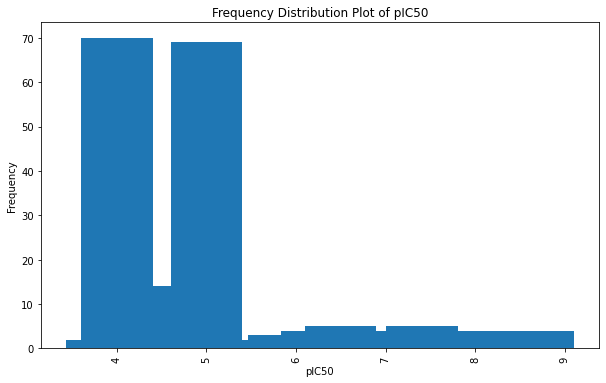

In [5]:
# First, calculate the frequency of each unique value
value_counts = df['pIC50'].value_counts().sort_index()

# Then, create a bar plot
plt.figure(figsize=(10,6))  # Set a larger figure size if needed
plt.bar(value_counts.index, value_counts.values)

# Set the title and labels for the plot
plt.title('Frequency Distribution Plot of pIC50')
plt.xlabel('pIC50')
plt.ylabel('Frequency')

plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap

# plt.savefig('figures/pIC50_frequency_plot.png')
# Show the plot
plt.show()

## 3. Data Pre-processing

In [6]:
# Examine X dimentions
X.shape

(555, 881)

In [7]:
Y.describe()

count   555.00
mean      5.64
std       1.18
min       3.84
25%       4.72
50%       5.46
75%       6.68
max       8.70
Name: pIC50, dtype: float64

In [8]:
# Remove low variance features and examine X dimentions after
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(555, 155)

In [9]:
split_ratios = [(0.9, 0.1), (0.85, 0.15), (0.8, 0.2), (0.75, 0.25), (0.7, 0.3), (0.65, 0.35), (0.6, 0.4)]

## 4. Comparing ML algorithms

In [10]:
# List to store all combined_data
all_data = []

100%|██████████| 42/42 [00:05<00:00,  8.38it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  9.11it/s]


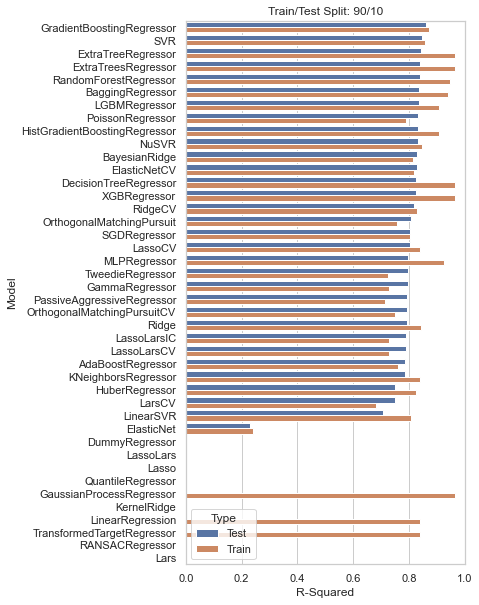

100%|██████████| 42/42 [00:04<00:00,  8.72it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  9.24it/s]


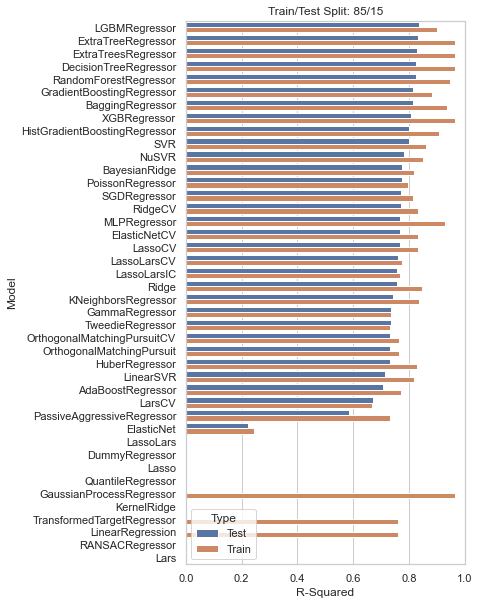

100%|██████████| 42/42 [00:04<00:00,  9.52it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.56it/s]


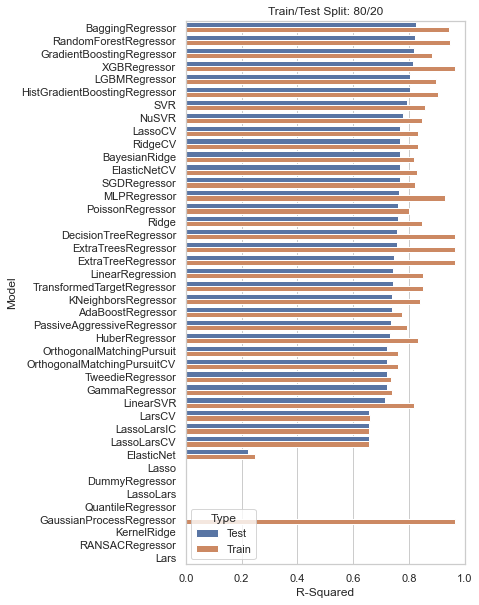

100%|██████████| 42/42 [00:04<00:00,  8.66it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.50it/s]


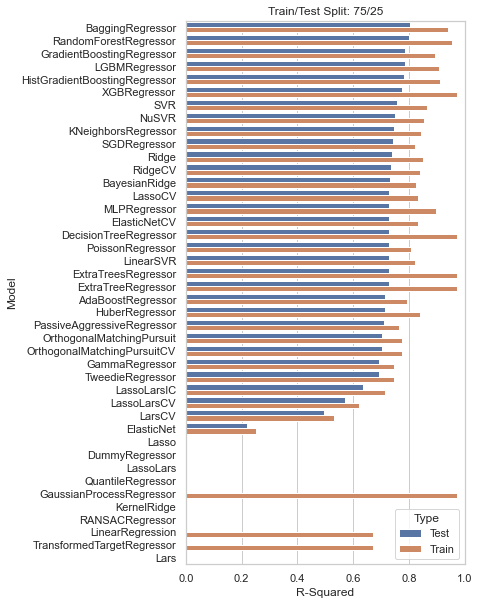

100%|██████████| 42/42 [00:04<00:00,  8.98it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.62it/s]


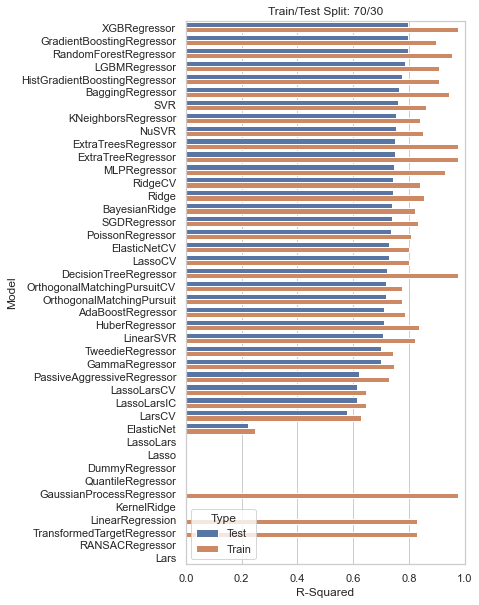

100%|██████████| 42/42 [00:04<00:00,  9.13it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.94it/s]


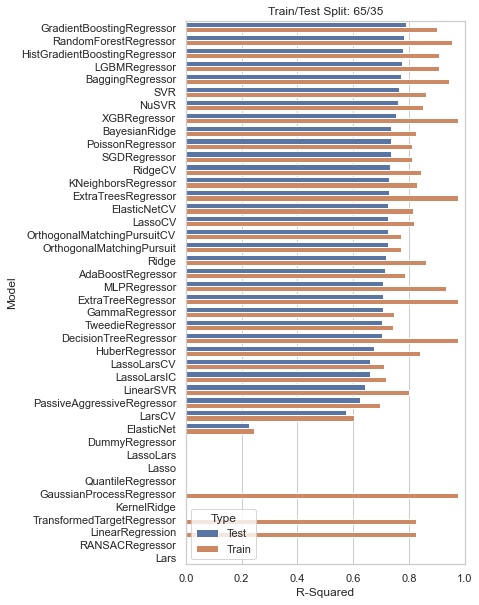

100%|██████████| 42/42 [00:04<00:00,  9.20it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  9.18it/s]


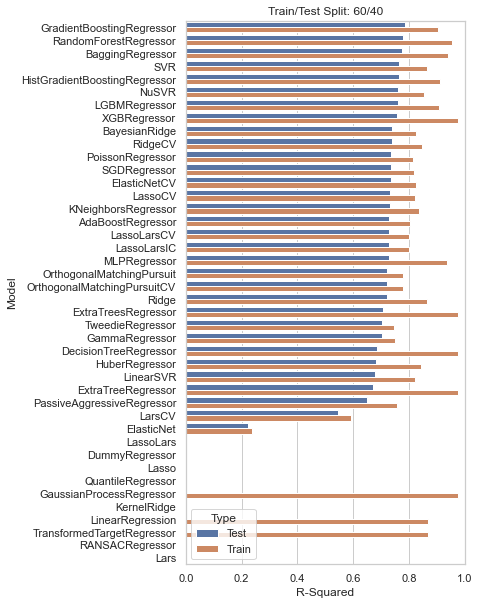

In [11]:
for train_ratio, test_ratio in split_ratios:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio, random_state=6)

    clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
    models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
    models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

    predictions_train['Type'] = 'Train'
    predictions_test['Type'] = 'Test'

    combined_data = pd.concat([predictions_train, predictions_test])
    sorted_combined_data = combined_data.sort_values(by=["Type", "R-Squared"], ascending=[True, False])

    # Add the split ratio to the DataFrame
    sorted_combined_data['Split'] = f"{int(train_ratio*100)}/{int(test_ratio*100)}"

    # Append combined_data to the list
    all_data.append(sorted_combined_data)

    plt.figure(figsize=(5, 10))
    sns.set_theme(style="whitegrid")

    ax = sns.barplot(y=sorted_combined_data.index, x="R-Squared", hue='Type', data=sorted_combined_data)
    ax.set(xlim=(0, 1))
    plt.title(f"Train/Test Split: {int(train_ratio*100)}/{int(test_ratio*100)}")
    
    # Save the plot to a file in the "./figures" directory
    plt.savefig(f"./figures/split_{int(train_ratio*100)}_{int(test_ratio*100)}.png", bbox_inches='tight')
    plt.show()

# 5. Data Visualization

In [12]:
# Concatenate all combined_data into a single DataFrame
all_data_df = pd.concat(all_data)

In [13]:
all_data_df
sorted_all_data = all_data_df.sort_values(by=["Type", "R-Squared"], ascending=[True, False])
sorted_all_data

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Type,Split
Model,,,,,,
GradientBoostingRegressor,1.08,0.86,0.50,0.16,Test,90/10
SVR,1.08,0.85,0.52,0.02,Test,90/10
ExtraTreeRegressor,1.09,0.84,0.53,0.01,Test,90/10
ExtraTreesRegressor,1.09,0.84,0.53,0.39,Test,90/10
RandomForestRegressor,1.09,0.84,0.54,0.29,Test,90/10
...,...,...,...,...,...,...
RANSACRegressor,-2303828618718972693446656.00,-1544055350843566693810176.00,1438675391082.97,0.21,Train,85/15
RANSACRegressor,-2681680609865513899655168.00,-1743395069167647804358656.00,1535330113941.51,0.21,Train,80/20
Lars,-154172927826084667381895921664.00,-92424080763957728780870483968.00,349038146910303.88,0.04,Train,70/30


In [14]:
all_data['Split' == '80/20']

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Type,Split
Model,,,,,,
GradientBoostingRegressor,1.08,0.86,0.50,0.16,Test,90/10
SVR,1.08,0.85,0.52,0.02,Test,90/10
ExtraTreeRegressor,1.09,0.84,0.53,0.01,Test,90/10
ExtraTreesRegressor,1.09,0.84,0.53,0.39,Test,90/10
RandomForestRegressor,1.09,0.84,0.54,0.29,Test,90/10
...,...,...,...,...,...,...
DummyRegressor,-0.45,0.00,1.16,0.01,Train,90/10
QuantileRegressor,-0.50,-0.03,1.18,0.73,Train,90/10
KernelRidge,-33.38,-22.68,5.65,0.02,Train,90/10


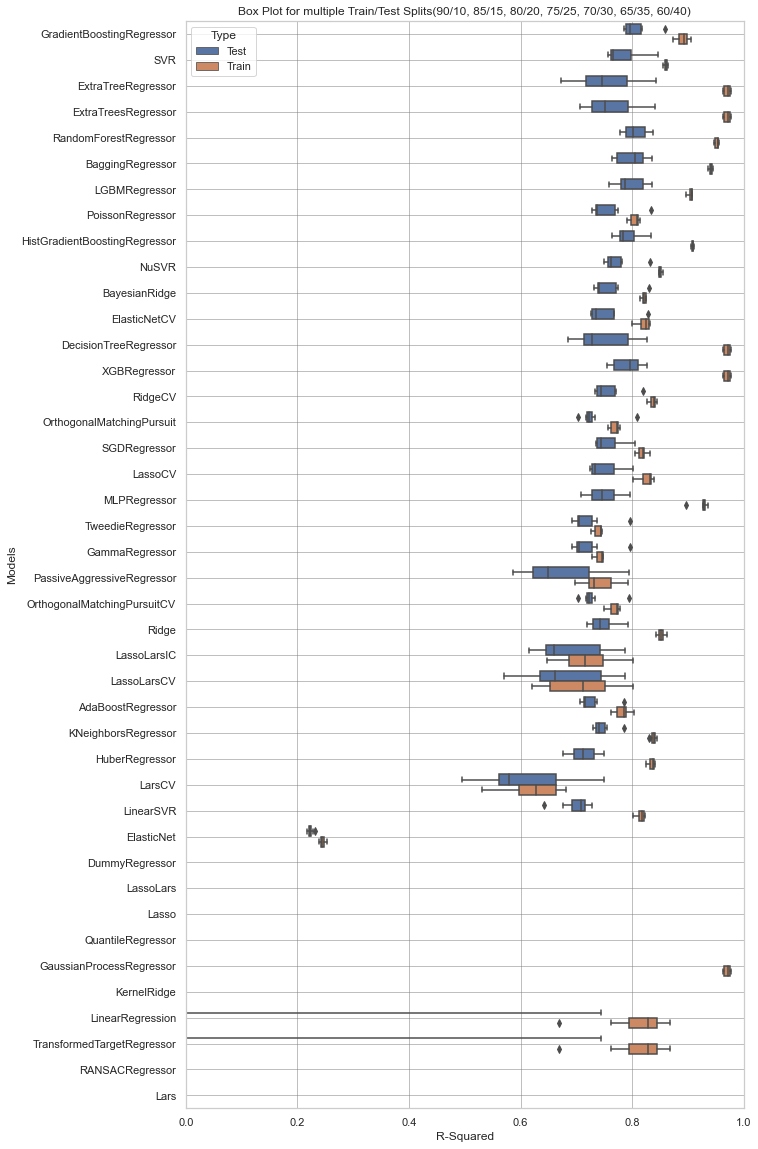

In [15]:
# Create a box plot for all splits
plt.figure(figsize=(10, 20))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(y=all_data_df.index, x="R-Squared", hue='Type', data=all_data_df)

plt.title("Box Plot for multiple Train/Test Splits(90/10, 85/15, 80/20, 75/25, 70/30, 65/35, 60/40)")
ax.set(xlim=(0, 1), xlabel="R-Squared", ylabel="Models")
# Adding gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.5)

#plt.savefig("figures/boxplot_all_splits.png", bbox_inches='tight')
plt.show()

In [16]:
# 1. Consolidate results
final_data = pd.concat(all_data)

In [17]:
# 2. Filter Train and Test Data
train_data = final_data[final_data['Type'] == 'Train']
test_data = final_data[final_data['Type'] == 'Test']

In [18]:
# 3. Sort and Retrieve Top Results
top_train_data = train_data.sort_values(by="R-Squared", ascending=False).head(20)
top_test_data = test_data.sort_values(by="R-Squared", ascending=False).head(20)

In [19]:
# 4. Concatenate Top Results
report_data = pd.concat([top_train_data, top_test_data])

In [20]:
top_test_data

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Type,Split
Model,,,,,,
GradientBoostingRegressor,1.08,0.86,0.50,0.16,Test,90/10
SVR,1.08,0.85,0.52,0.02,Test,90/10
ExtraTreeRegressor,1.09,0.84,0.53,0.01,Test,90/10
ExtraTreesRegressor,1.09,0.84,0.53,0.39,Test,90/10
RandomForestRegressor,1.09,0.84,0.54,0.29,Test,90/10
BaggingRegressor,1.09,0.84,0.54,0.05,Test,90/10
LGBMRegressor,1.19,0.84,0.52,0.04,Test,85/15
LGBMRegressor,1.09,0.84,0.54,0.05,Test,90/10
PoissonRegressor,1.09,0.83,0.54,0.02,Test,90/10


In [22]:
# Displaying the table (optional)
report_data

# To export the table to a CSV file:
#report_data.to_csv('top_report.csv', index=False)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Type,Split
Model,,,,,,
ExtraTreesRegressor,0.96,0.98,0.18,0.36,Train,65/35
ExtraTreeRegressor,0.96,0.98,0.18,0.01,Train,65/35
DecisionTreeRegressor,0.96,0.98,0.18,0.01,Train,65/35
GaussianProcessRegressor,0.96,0.98,0.18,0.03,Train,65/35
XGBRegressor,0.96,0.98,0.18,0.08,Train,65/35
ExtraTreeRegressor,0.96,0.98,0.18,0.01,Train,70/30
DecisionTreeRegressor,0.96,0.98,0.18,0.01,Train,70/30
ExtraTreesRegressor,0.96,0.98,0.18,0.37,Train,70/30
GaussianProcessRegressor,0.96,0.98,0.18,0.04,Train,70/30
